## 1.1处理缺失值

In [1]:
from pandas import Series,DataFrame
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df1 = DataFrame([[3,5,3],[1,6,np.nan],
                ['lili',np.nan,'pop'],[np.nan,'a','b']])
df1

,0,1,2
0,3,5,3
1,1,6,NaN
2,lili,NaN,pop
3,NaN,a,b


In [3]:
df1.isnull()   #True的为缺失值

,0,1,2
0,False,False,False
1,False,False,True
2,False,True,False
3,True,False,False


In [4]:
df1.notnull()   #False为缺失值

,0,1,2
0,True,True,True
1,True,True,False
2,True,False,True
3,False,True,True


In [5]:
df1.isnull().sum()

0    1
1    1
2    1
dtype: int64

In [6]:
df1.isnull().sum().sum()

3

In [7]:
df1.isnull().values.any()

True

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
0    3 non-null object
1    3 non-null object
2    3 non-null object
dtypes: object(3)
memory usage: 176.0+ bytes


In [9]:
df1.dropna()

,0,1,2
0,3,5,3


In [10]:
df2 = DataFrame(np.arange(12).reshape(3,4))
df2

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [11]:
df2.ix[2,:] = np.nan
df2[3] = np.nan
df2

f:\Anaconda3\envs\data-analysis\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,0,1,2,3
0,0.0,1.0,2.0,NaN
1,4.0,5.0,6.0,NaN
2,NaN,NaN,NaN,NaN


In [12]:
df2.dropna(how='all')

,0,1,2,3
0,0.0,1.0,2.0,NaN
1,4.0,5.0,6.0,NaN


In [13]:
df2.dropna(how='all',axis=1)

,0,1,2
0,0.0,1.0,2.0
1,4.0,5.0,6.0
2,NaN,NaN,NaN


In [14]:
df2

,0,1,2,3
0,0.0,1.0,2.0,NaN
1,4.0,5.0,6.0,NaN
2,NaN,NaN,NaN,NaN


In [15]:
df2.fillna(0)

,0,1,2,3
0,0.0,1.0,2.0,0.0
1,4.0,5.0,6.0,0.0
2,0.0,0.0,0.0,0.0


In [16]:
df2.fillna({1:6,3:0})

,0,1,2,3
0,0.0,1.0,2.0,0.0
1,4.0,5.0,6.0,0.0
2,NaN,6.0,NaN,0.0


In [17]:
df2

,0,1,2,3
0,0.0,1.0,2.0,NaN
1,4.0,5.0,6.0,NaN
2,NaN,NaN,NaN,NaN


In [18]:
df2.fillna({1:6,3:0},inplace=True)
df2

,0,1,2,3
0,0.0,1.0,2.0,0.0
1,4.0,5.0,6.0,0.0
2,NaN,6.0,NaN,0.0


In [19]:
df2.fillna(method='ffill')

,0,1,2,3
0,0.0,1.0,2.0,0.0
1,4.0,5.0,6.0,0.0
2,4.0,6.0,6.0,0.0


In [20]:
df2

,0,1,2,3
0,0.0,1.0,2.0,0.0
1,4.0,5.0,6.0,0.0
2,NaN,6.0,NaN,0.0


In [21]:
df2[0] = df2[0].fillna(df2[0].mean())
df2

,0,1,2,3
0,0.0,1.0,2.0,0.0
1,4.0,5.0,6.0,0.0
2,2.0,6.0,NaN,0.0


In [22]:
df2.fillna?

## 1.2 移除缺失值

In [23]:
data = {
    'name':['张三', '李四', '张三', '小明'],
    'sex':['female', 'male', 'female', 'male'],
    'year':[2001, 2002, 2001, 2002],
    'city':['北京', '上海', '北京', '北京']
}
df1 = DataFrame(data)
df1

,name,sex,year,city
0,张三,female,2001,北京
1,李四,male,2002,上海
2,张三,female,2001,北京
3,小明,male,2002,北京


In [24]:
df1.duplicated()

0    False
1    False
2     True
3    False
dtype: bool

In [25]:
df1.drop_duplicates()

,name,sex,year,city
0,张三,female,2001,北京
1,李四,male,2002,上海
3,小明,male,2002,北京


In [26]:
df1.drop_duplicates(['sex','year'])

,name,sex,year,city
0,张三,female,2001,北京
1,李四,male,2002,上海


In [27]:
df1.drop_duplicates(['sex','year'],keep='last')

,name,sex,year,city
2,张三,female,2001,北京
3,小明,male,2002,北京


## 1.3 替换值

In [28]:
data = {
    'name':['张三', '李四', '王五', '小明'],
    'sex':['female', 'male', '', 'male'],
    'year':[2001, 2003, 2001, 2002],
    'city':['北京', '上海', '', '北京']
}
df1 = DataFrame(data)
df1

,name,sex,year,city
0,张三,female,2001,北京
1,李四,male,2003,上海
2,王五,,2001,
3,小明,male,2002,北京


In [29]:
df1.replace('','不详')

,name,sex,year,city
0,张三,female,2001,北京
1,李四,male,2003,上海
2,王五,不详,2001,不详
3,小明,male,2002,北京


In [30]:
df1.replace(['',2001],['不详',2002])

,name,sex,year,city
0,张三,female,2002,北京
1,李四,male,2003,上海
2,王五,不详,2002,不详
3,小明,male,2002,北京


In [31]:
df1.replace({'':'不详',2001:2002})

,name,sex,year,city
0,张三,female,2002,北京
1,李四,male,2003,上海
2,王五,不详,2002,不详
3,小明,male,2002,北京


## 1.4 数据转换

In [32]:
data = {
    'name':['张三', '李四', '王五', '小明'],
    'math':[79, 52, 63, 92]
}
df2 = DataFrame(data)
df2

,name,math
0,张三,79
1,李四,52
2,王五,63
3,小明,92


In [33]:
def f(x):
    if x >= 90:
        return '优秀'
    elif 70<=x<90:
        return '良好'
    elif 60<=x<70:
        return '合格'
    else:
        return '不合格'

In [34]:
df2['class'] = df2['math'].map(f)
df2

,name,math,class
0,张三,79,良好
1,李四,52,不合格
2,王五,63,合格
3,小明,92,优秀


In [35]:
del df2['class']
df2

,name,math
0,张三,79
1,李四,52
2,王五,63
3,小明,92


In [36]:
df2['class'] = df2['math'].apply(f)
df2

,name,math,class
0,张三,79,良好
1,李四,52,不合格
2,王五,63,合格
3,小明,92,优秀


## 1.5 异常值

In [37]:
df3 = DataFrame(np.arange(10),columns=['X'])
df3['Y'] = 2 * df3['X'] + 0.5
df3.iloc[9,1] = 185
df3

,X,Y
0,0,0.5
1,1,2.5
2,2,4.5
3,3,6.5
4,4,8.5
5,5,10.5
6,6,12.5
7,7,14.5
8,8,16.5
9,9,185.0


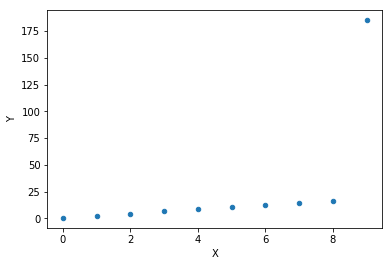

In [38]:
df3.plot(kind='scatter',x='X',y='Y')

## 2.1 merge合并

In [39]:
price = DataFrame({
    'fruit':['apple','banana','orange'],
    'price':[23,32,45]
})
amount = DataFrame({
    'fruit':['apple','banana','apple','apple','banana','pear'],
    'amount':[5,3,6,3,5,7]
})

In [40]:
price

,fruit,price
0,apple,23
1,banana,32
2,orange,45


In [41]:
amount

,fruit,amount
0,apple,5
1,banana,3
2,apple,6
3,apple,3
4,banana,5
5,pear,7


In [42]:
pd.merge(amount,price)

,fruit,amount,price
0,apple,5,23
1,apple,6,23
2,apple,3,23
3,banana,3,32
4,banana,5,32


In [43]:
pd.merge(amount,price,on='fruit')

,fruit,amount,price
0,apple,5,23
1,apple,6,23
2,apple,3,23
3,banana,3,32
4,banana,5,32


In [44]:
pd.merge(amount,price,left_on='fruit',right_on='fruit')

,fruit,amount,price
0,apple,5,23
1,apple,6,23
2,apple,3,23
3,banana,3,32
4,banana,5,32


In [45]:
pd.merge(amount,price,how='left')

,fruit,amount,price
0,apple,5,23.0
1,banana,3,32.0
2,apple,6,23.0
3,apple,3,23.0
4,banana,5,32.0
5,pear,7,NaN


In [46]:
pd.merge(amount,price,how='right')

,fruit,amount,price
0,apple,5.0,23
1,apple,6.0,23
2,apple,3.0,23
3,banana,3.0,32
4,banana,5.0,32
5,orange,NaN,45


In [47]:
pd.merge(amount,price,how='outer')

,fruit,amount,price
0,apple,5.0,23.0
1,apple,6.0,23.0
2,apple,3.0,23.0
3,banana,3.0,32.0
4,banana,5.0,32.0
5,pear,7.0,NaN
6,orange,NaN,45.0


In [48]:
price2 = DataFrame({
    'fruit':['apple','banana','orange','apple'],
    'price':[23,32,45,25]
})
amount2 = DataFrame({
    'fruit':['apple','banana','apple','apple','banana','pear'],
    'amount':[5,3,6,3,5,7]
})

In [49]:
amount2

,fruit,amount
0,apple,5
1,banana,3
2,apple,6
3,apple,3
4,banana,5
5,pear,7


In [50]:
price2

,fruit,price
0,apple,23
1,banana,32
2,orange,45
3,apple,25


In [51]:
pd.merge(amount2,price2)

,fruit,amount,price
0,apple,5,23
1,apple,5,25
2,apple,6,23
3,apple,6,25
4,apple,3,23
5,apple,3,25
6,banana,3,32
7,banana,5,32


In [52]:
left = DataFrame({
    'key1':['one','one','two'],
    'key2':['a','b','a'],
    'val1':[2,3,4]
})
right = DataFrame({
    'key1':['one','one','two','two'],
    'key2':['a','a','a','b'],
    'val2':[5,6,7,8]
})

In [53]:
left

,key1,key2,val1
0,one,a,2
1,one,b,3
2,two,a,4


In [54]:
right

,key1,key2,val2
0,one,a,5
1,one,a,6
2,two,a,7
3,two,b,8


In [55]:
pd.merge(left,right,on=['key1','key2'],how='outer')

,key1,key2,val1,val2
0,one,a,2.0,5.0
1,one,a,2.0,6.0
2,one,b,3.0,NaN
3,two,a,4.0,7.0
4,two,b,NaN,8.0


In [56]:
pd.merge(left,right,on='key1')

,key1,key2_x,val1,key2_y,val2
0,one,a,2,a,5
1,one,a,2,a,6
2,one,b,3,a,5
3,one,b,3,a,6
4,two,a,4,a,7
5,two,a,4,b,8


In [57]:
pd.merge(left,right,on='key1',suffixes=('_left','_right'))

,key1,key2_left,val1,key2_right,val2
0,one,a,2,a,5
1,one,a,2,a,6
2,one,b,3,a,5
3,one,b,3,a,6
4,two,a,4,a,7
5,two,a,4,b,8


In [58]:
left2 = DataFrame({
    'key':['a','a','b','b','c'],
    'val1':range(5)
})
right2 = DataFrame({
    'val2':[5,7]},
    index = ['a','b']
)

In [59]:
left2

,key,val1
0,a,0
1,a,1
2,b,2
3,b,3
4,c,4


In [60]:
right2

,val2
a,5
b,7


In [61]:
pd.merge(left2,right2,left_on='key',right_index=True)

,key,val1,val2
0,a,0,5
1,a,1,5
2,b,2,7
3,b,3,7


## 2.2 数据重塑

In [62]:
df = DataFrame(np.arange(9).reshape(3,3),
              index = ['a','b','c'],
              columns=['one','two','three'])
df.index.name = 'alph'
df.columns.name = 'number'
df

number,one,two,three
alph,,,
a,0,1,2
b,3,4,5
c,6,7,8


In [63]:
result = df.stack()
result

alph  number
a     one       0
      two       1
      three     2
b     one       3
      two       4
      three     5
c     one       6
      two       7
      three     8
dtype: int32

In [64]:
result.unstack()

number,one,two,three
alph,,,
a,0,1,2
b,3,4,5
c,6,7,8


## 3.1字符串方法

In [65]:
data = {
    'data':['张三|男', '李四|女', '王五|女', '小明|男'],
}
df = DataFrame(data)
df

,data
0,张三|男
1,李四|女
2,王五|女
3,小明|男


In [66]:
result = df['data'].apply(lambda x:Series(x.split('|')))
result

,0,1
0,张三,男
1,李四,女
2,王五,女
3,小明,男


In [67]:
new_df = df['data'].str.split('|')
new_df

0    [张三, 男]
1    [李四, 女]
2    [王五, 女]
3    [小明, 男]
Name: data, dtype: object

In [68]:
df['name'] = new_df.str[0]
df['sex'] = new_df.str[1]
df

,data,name,sex
0,张三|男,张三,男
1,李四|女,李四,女
2,王五|女,王五,女
3,小明|男,小明,男


## 3.2 正则表达式

In [69]:
df2 = DataFrame({
    'email':['102345@qq.com','342167@qq.com','65132@qq.com']
})
df2

,email
0,102345@qq.com
1,342167@qq.com
2,65132@qq.com


In [70]:
df2['email'].str.findall('(.*?)@')

0    [102345]
1    [342167]
2     [65132]
Name: email, dtype: object

In [71]:
df2['QQ'] = df2['email'].str.findall('(.*?)@').str.get(0)
df2

,email,QQ
0,102345@qq.com,102345
1,342167@qq.com,342167
2,65132@qq.com,65132


In [72]:
from pandas import Series,DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns  #导入seaborn绘图库
%matplotlib inline

In [73]:
iris_data = pd.read_csv(open('H:\我的视频录制\从零开始学Python数据分析\data\iris-data.csv'))
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [74]:
iris_data.shape

(150, 5)

In [75]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [76]:
iris_data['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [77]:
iris_data.loc[iris_data['class'] == 'versicolor', 'class'] = 'Iris-versicolor'
iris_data.loc[iris_data['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'

iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

f:\Anaconda3\envs\data-analysis\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
f:\Anaconda3\envs\data-analysis\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


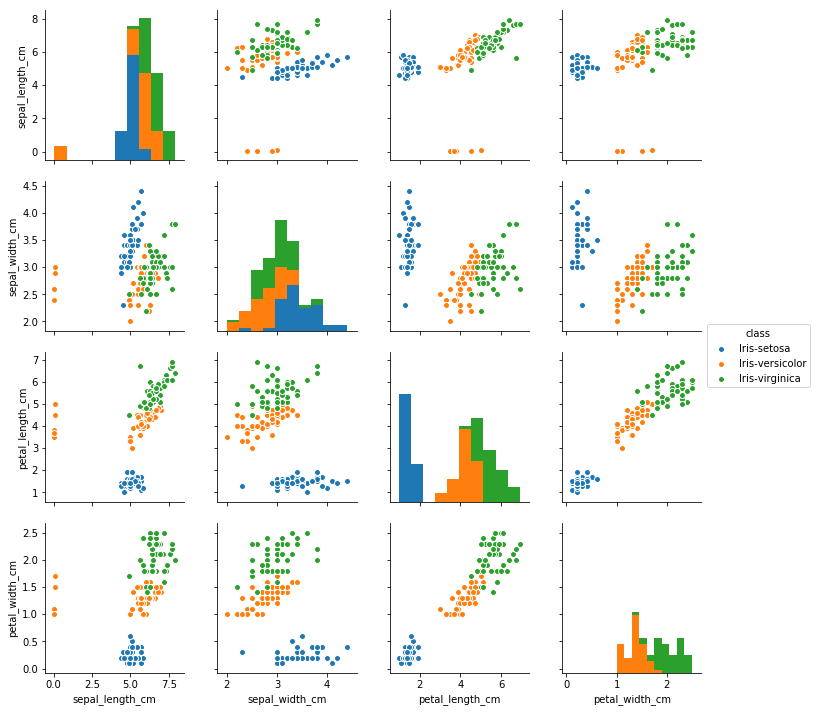

In [78]:
sns.pairplot(iris_data, hue='class')

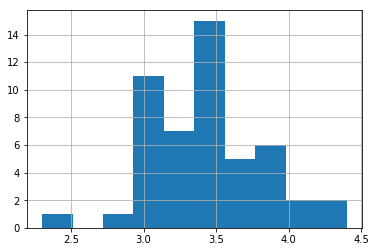

In [79]:
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'sepal_width_cm'].hist()

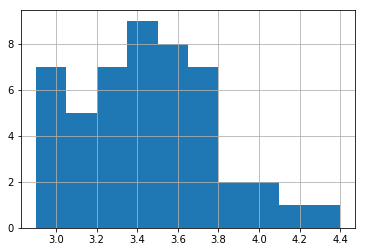

In [80]:
iris_data = iris_data.loc[(iris_data['class'] != 'Iris-setosa') | (iris_data['sepal_width_cm'] >= 2.5)]
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'sepal_width_cm'].hist()

In [81]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
              (iris_data['sepal_length_cm'] < 1.0)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


In [82]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
              (iris_data['sepal_length_cm'] < 1.0),
              'sepal_length_cm'] *= 100.0

f:\Anaconda3\envs\data-analysis\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [83]:
iris_data.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [84]:
iris_data[iris_data['petal_width_cm'].isnull()]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


In [85]:
iris_data.dropna(inplace=True)

f:\Anaconda3\envs\data-analysis\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [86]:
iris_data.to_csv('iris-clean-data.csv', index=False)

In [87]:
iris_data = pd.read_csv(open('iris-clean-data.csv'))
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [88]:
iris_data.shape

(144, 5)

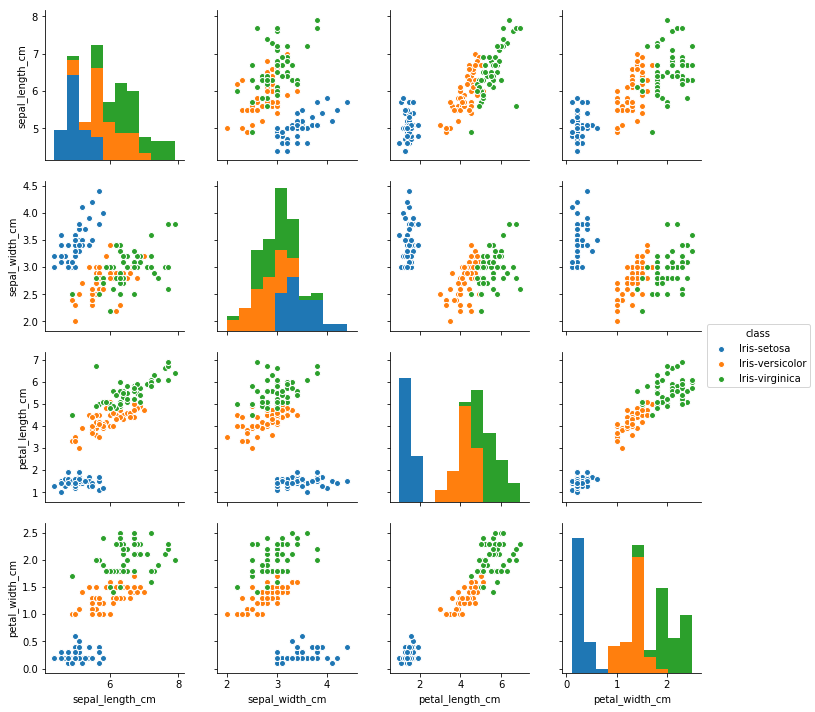

In [89]:
sns.pairplot(iris_data, hue='class')